***Total Avocado sales by Month in 2017***
Data retrieved for national Hass avocado sales

In [ ]:
# Import necessary Libraries
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [39]:
# First, I am going to drop rows that have na values in the date column
data = data.dropna(subset=['Date'])

In [40]:
# next I want to assign the Date column as a datetime
data['Date'] = pd.to_datetime(data['Date'])

In [88]:
# Now I want to pull out 2017 data only
df = data[(data['Date'] > '2016-12-31') & (data['Date'] <= '2017-12-31')]
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
5616,0,2017-12-31,1.47,113514.42,2622.70,101135.53,20.25,9735.94,5556.98,4178.96,0.0,conventional,2017,Albany
5617,1,2017-12-24,1.45,77039.09,2811.71,58592.23,19.06,15616.09,6863.18,8752.91,0.0,conventional,2017,Albany
5618,2,2017-12-17,1.43,70677.56,2578.95,50811.52,79.18,17207.91,8914.13,8293.78,0.0,conventional,2017,Albany
5619,3,2017-12-10,1.29,92325.53,3220.05,75147.56,104.36,13853.56,7268.21,6585.35,0.0,conventional,2017,Albany
5620,4,2017-12-03,1.39,139970.00,3772.00,126551.00,136.00,9511.00,7061.00,2450.00,0.0,conventional,2017,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17596,46,2017-01-29,1.30,17839.37,1486.34,4498.48,26.12,11828.43,11821.76,6.67,0.0,organic,2017,WestTexNewMexico
17597,47,2017-01-22,1.21,16430.64,1413.93,2820.53,20.25,12175.93,12073.07,102.86,0.0,organic,2017,WestTexNewMexico
17598,48,2017-01-15,1.19,17014.23,1203.87,2904.22,23.07,12883.07,12476.57,406.50,0.0,organic,2017,WestTexNewMexico
17599,49,2017-01-08,1.18,14375.39,1327.98,2617.20,5.75,10424.46,10283.85,140.61,0.0,organic,2017,WestTexNewMexico


In [60]:
# I'd like to group my data by month, so first I'll set the index, then group the data, add it up, and divide by 100mil
df.index = pd.to_datetime(df['Date'],format='%Y/%m/%d')
totalSalesByMonth = df.groupby(by=[df.index.month])['Total Volume'].sum()/100000000

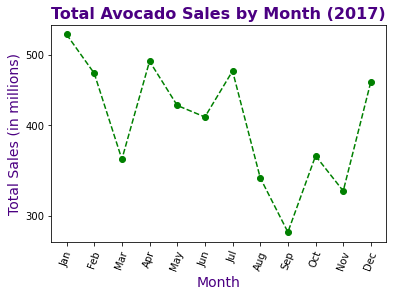

In [83]:
# Ok, ready to start creating visualizations
# First I'd like to create a line chart
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure()
plt.title("Total Avocado Sales by Month (2017)", fontsize=16, c='indigo', weight='bold')
plt.xlabel("Month", fontsize=14, c='indigo')
plt.ylabel("Total Sales (in millions)", fontsize=14, c='indigo')
plt.yscale("log", basey=10)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], months , rotation=70)
plt.yticks([0, 1, 2, 3, 4, 5], [0, 100, 200, 300, 400, 500])
plt.plot(totalSalesByMonth, 'go--')

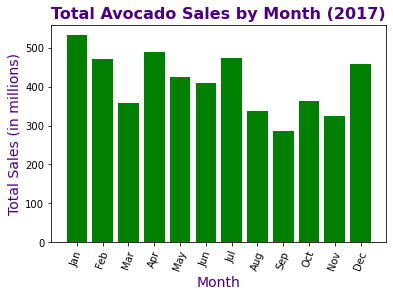

In [93]:
# I will display the same data on a bar chart
plt.bar(months, totalSalesByMonth, color='g')
plt.title("Total Avocado Sales by Month (2017)", fontsize=16, c='indigo', weight='bold')
plt.xlabel("Month", fontsize=14, c='indigo')
plt.ylabel("Total Sales (in millions)", fontsize=14, c='indigo')
plt.xticks(rotation=70)
plt.yticks([0, 1, 2, 3, 4, 5], [0, 100, 200, 300, 400, 500])
plt.show()

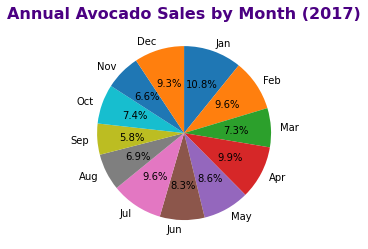

In [117]:
# I will display the same data on a pie chart   
plt.pie(totalSalesByMonth, labels=months, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Annual Avocado Sales by Month (2017)", fontsize=16, c='indigo', weight='bold')
plt.show()